In [1]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:yleisen')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [2]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [3]:
print(meta['description'])

Yleistä asumistukea saaneet ruokakunnat tilastointikuukauden aikana sekä heidän keskimääräinen asumistuki, asumismenot ja asumistukitulot kuukaudessa. Raportille on laskettu ruokakunnan asumismenojen osuus asumistukeen vaikuttaneista tuloista ennen asumistukea sekä asumistuen jälkeen. Lisäksi raportilla on tiedot yleisen asumistuen saajien keskimääräisestä asunnon pinta-alasta ja asumismenoista pinta-alaneliötä kohden. Ruokakunnan elämäntilanne on päätelty vuoden 2015 tiedoista alkaen ruokakunnan tulojen mukaan ja yksi ruokakunta tilastoituu aina yhteen elämäntilanneluokkaan. Vuosien 2007–2014 tiedoissa ruokakunnan elämäntilanne on päätelty erikseen hakijan ja puolison tulojen mukaan, ja sama ruokakunta voi tilastoitua kahteen eri elämäntilanneluokkaan.


**Datan muuttujatieto**

In [4]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,type,values
0,default,kuntanumero,integer,"[5, 9, 10, 16, 18, 19, 20, 35, 43, 46, 47, 49,..."
1,default,kunta,string,"[Alajärvi, Alavieska, Alavus, Asikkala, Askola..."
2,default,aikajakso,string,"[vuosi, kuukausi]"
3,default,ruokakuntatyyppi,string,"[Yhteensä, Yksin asuvat, Lapsettomat parit, La..."
4,default,saajaruokakunnat,number,"[4, 65241]"
5,default,asumistuki_keskim_euroa_kk,number,"[64.8, 696.41]"
6,default,asumismenot_keskim_euroa_kk,number,"[180.48, 1170.13]"
7,default,asumistukitulo_keskim_euroa_kk,number,"[116.8, 3549.6]"
8,default,asumismenot_ennen_asumistukea_pros,number,"[16, 246.5]"
9,default,asumismenot_asumistuen_jalkeen_pros,number,"[7.1, 167.6]"


**Datan ensimmäiset rivit**

In [5]:
print(dat.head())

   kuntanumero      kunta aikajakso ruokakuntatyyppi  saajaruokakunnat  \
0            5   Alajärvi     vuosi         Yhteensä             131.0   
1            9  Alavieska     vuosi         Yhteensä              34.0   
2           10     Alavus     vuosi         Yhteensä             163.0   
3           16   Asikkala     vuosi         Yhteensä             103.0   
4           18     Askola     vuosi         Yhteensä              18.0   

   asumistuki_keskim_euroa_kk  asumismenot_keskim_euroa_kk  \
0                      204.65                       401.81   
1                      168.84                       389.82   
2                      203.18                       407.83   
3                      210.84                       399.29   
4                      205.24                       406.06   

   asumistukitulo_keskim_euroa_kk  asumismenot_ennen_asumistukea_pros  \
0                          789.32                                50.9   
1                          826.00   

In [7]:
plotdat = (dat
 .query('aikajakso == "vuosi"')
 .query('vuosi == "2015"')
 .query('ruokakuntatyyppi == "Yhteensä"')
 .sort_values(by='asumistuki_keskim_euroa_kk', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

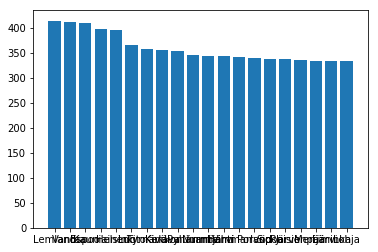

In [8]:
plt.bar(plotdat['kunta'], plotdat['asumistuki_keskim_euroa_kk'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [9]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id aikajakso  \
0  '0':15 '1':19 '131':5 '2007':20 '204':6 '25':1...    1     vuosi   
1  '00':11 '168':6 '2':13 '2007':20 '26':14 '34':...    2     vuosi   
2  '0':13,19 '10':1 '163':5 '18':7 '2':17 '2007':...    3     vuosi   
3  '1':13 '103':5 '16':1 '2007':20 '210':6 '26':1...    4     vuosi   
4  '06':9 '18':1,5 '2007':20 '205':6 '24':7 '29':...    5     vuosi   

  asumismenot_asumistuen_jalkeen_pros asumismenot_ennen_asumistukea_pros  \
0                                25,0                               50,9   
1                                26,8                               47,2   
2                                25,6                               51,0   
3                                26,9                               57,1   
4                                29,9                               60,5   

  asumismenot_keskim_e_m2_kk asumismenot_keskim_euroa_kk  \
0                        5,4                      401,81